# 1. Intro a la clase



## Brief difference between Supervised and Unsupervised Learning.

![Supervised vs Unsupervised](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/Images/supervised_unsupervised.png "Supervised vs Unsupervised")

Seguro que ya se ha dado en Machine Learning, sólo para estar todos en la misma página. En Supervised Learning tenemos etiquetas. Es decir, queremos "separar". Cuando empezamos a plantear un modelo para supervised learning, lo único que tenemos claríssimo es el formato del output. Podemos discutir que features usamos, que modelo se adapta mejor, que función de optimización, si usamos regularización, etc etc, pero lo único que no podemos discutir, es que estamos escogiendo entre perros y gatos, porque solo podemos escoger entre perros y gatos. Si luego en producción alguien quiere predecir girafas, muy buena suerte, y ya podéis empezar a descargaros fotos de girafas.

En unsupervised learning, hay menos discusión de modelos, pero en cambio, no tenemos ni idea de como es el la distribución de clases. Con lo cuál el problema es muchísimo más grande. En definitiva, en unsupervised learning, el *auténtico machine learning* le damos datos a la máquina, y ya se espavilara, y de verdad, porque no le vamos a decir ni cuando se esta equivocando, para que nos devuelva información útil. 

NLP no se escapa de usar unsupervised learning.

![](https://i.imgur.com/jbc5S9a.jpg)

Por cierto, en la última clase, que vimos modelado del lenguaje, tiene "etiquetas" y ni así se libra del debate supervised vs unsupervised. (Esto es de hace 20 días en twitter), ni los mismos expertos se ponen de acuerdo.

En definitiva, que podemos aplicar también unsupervised learning a NLP, y ahora veremos cómo, y que usos podemos darle.




# Unsupervised Learning in NLP

Que pasa cuando no tenemos acceso a labels en NLP? Unsupervised Learning. Hay varios modelos y varios objectivos en aplicar técnicas de unsupervised Learning en NLP. El objetivo más común es *Topic Modeling*.  Como lo conseguimos? Uno de los algoritmos más comunes es el conocido como Latent Dirichlet Allocation (LDA) [Paper](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf). (Como nota interesante, el paper esta escrito por 3 de las personas más influyenentes en el mundo de la inteligencia artificial, no solo Machine Learning o Deep Learning). Quizás el más conocido es Andrew NG, muy conocido por el curso de intro al Machine Learning en Coursera. Pero si os interesa estadística y el modelado bayesiano de datos, Blei y Jordan son dos figuras claves para entender el panorama actual.

Dicho esto, hay otros algoritmos muy populares como la factorizacion de matrices no negativas (Non-Negative Matrix Factorization *NNF*) o otros incluso SVD  (singular value decomposition). Estos metodos no los veremos, pero quizás en álgebra habéis visto como funcionaban.

## 1. Cuál es el objetivo de Topic Modeling?

Imaginaros que quereis hacer un algoritmo que os recomiende tweets, y no teneis claro si podeis montar un algoritmo supervisado porque no teneis taggeados datos con los clásicos like/dislike o ratios. Sin esto, no podéis entrenar un algoritmo supervisado. Además tampoco tenéis ninguna relación usuario-items donde se podría aplicar *Collaborative Filtering [(post con breve explicación)](https://medium.com/@cfpinela/recommender-systems-user-based-and-item-based-collaborative-filtering-5d5f375a127f)* pero queremos tener algo que sea capaz de dar con tweets similares. Como lo hacemos? Topic Modeling al rescate. La idea de detrás del topic modeling es fácil: un documento esta formado por n-topics, y cada topic esta formado por una distribución de palabras. Y entonces podriamos representar tweets con topics similares y recomendarlos, por ejemplo, no solo unicamente basado en palabras.


##### Extra info

[LDA medium post](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)
[Buena explicación de LDA](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/)


## 2. Word Embeddings

Otra de las aplicaciones que veremos hoy, y que va a ser clave en el desarrollo e introducción clave del Deep Learning en NLP, son los words embeddings. Entended que como muchos aspectos del deep learning, son algoritmos que vienen de muy atrás, y que con alguna modificación tienen una mejora enorme, con lo que se convierten en 100% aplicables. Hoy en día, el 100% de los algoritmos que se usan en NLP, usan word embeddings. Estan en todas partes. En vuestro telefono, en vuestros recomendadores, en la respuesta automatica del correo, vaya, que cada cosa que tecleeis, seguro usa word embeddings. De hecho, se hay estudios y papers donde usan técnicas muy similares a las usadas para word embeddings que se usan para mil cosas. Os gustan los emojis? Se han aplicado. [Emojis](http://sempub.taln.upf.edu/tw/emojis/), para emojis aplicados y ver su semantismo dependiendo del color del emoji? [Aquí](http://www.aclweb.org/anthology/S18-2011). Para casos muy interesantes como el análisis de Bases de datos de grafo? [Pues tambien](https://github.com/D2KLab/entity2vec) En fin, que para lo que querais tenéis embeddings. En NLP nos centraremos en los word embeddings, que ya tenemos suficiente con eso. 

Lo veremos mejor en las siguientes notebooks, pero muy muy MUY en resumen, en lugar de representar el texto con una id que representa un token, es decir... dibujo mejor.

![](https://i.imgur.com/4jHoUVz.png)

Aquí si veremos factorización de matrices para generar-los, y tambien nuestra primera red neuronal.

# 2. Topic Modeling
### 2.1 LDA

La siguiente imagen da un claro ejemplo de que es lo que queremos conseguir, no muy bien como lo haremos, pero si cual es el objetivo.

![Topic Modeling](http://chdoig.github.io/pytexas2015-topic-modeling/images/topic-modeling-2.png "Topic Modeling")

Antes de empezar con la implementación, un poquito de teoría (veremos muy poca), pero consideraciones previas. 

Topic modeling no se escapa de algunos de los problemas que hemos encontrado previamente en fases de preproceso y elección de features.


*   Fijaremos el vocabulario antes de empezar. Con lo cual tendremos el mismo problema que tenemos hasta la fecha cuando usamos palabras como features, todo lo que no este dentro al empezar, esta fuera. (Igual que cuando especificamos un proyecto en el trabajo, que todo lo que no se ha dicho no se hace.)
*   Seguiremos con la representación de bag-of-words que hemos usado hasta la saciedad hasta la fecha.

Es importante decir que LDA es un modelo generativo, igual que lo es un naive Bayes classifier, tal y como vimos en el problema de Language Modeling. No entraremos en las matemátias pero básicamente, un modelo *generativo* nos permite una vez entrenado, crear samples de x, es decir "inputs similares" a los usados para entrenar el modelo, por el contrario, un modelo *discriminativo* solo nos permite dado un input, dar un output, una etiqueta.

Que es la cajita esa negra?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Latent_Dirichlet_allocation.svg/250px-Latent_Dirichlet_allocation.svg.png)

La cajita negra es estas cajitas, que representan el algoritmo con todos sus parametros.

El primer parámetro y el más signitifactivo a escoger es T. T es el numero de topics que queremos. Hemos dicho que no tenemos etiquetas, así que no sabemos cuántas tenemos. Así pues, escogeremos un numero T que nos parezca. Este determinara lo que terminara aprendiendo el modelo. si escogemos T=2, al final tendremos por cada documento una distribución de 2 topics, y cada palabra tendrá una distribución sobre estos 2 topics. Más adelante veremos como escoger un T de forma algo más óptima, pero no nos libraremos del prueba y error.

### Modelos gráficos

![](http://mcburton.net/blog/joy-of-tm/images/image02.png)

![](https://datawarrior.files.wordpress.com/2016/04/proj3_lda20structure.png?w=640)

Quizás estos dos dibujos ayuden un poco más, ahora explicaremos un poco la fase de aprendizaje de este algoritmo.

¿Qué son Alpha y Beta?

Alpha (document-topic density): Cuánta más alta, los documentos tendrán más topics.

Beta (topic-word density): Cuánto más grande sea beta, los topics tendran más palabras y viceversa.

![](https://image.slidesharecdn.com/topicmodeling-140603161649-phpapp02/95/topic-modeling-13-638.jpg?cb=1402404085)


![](https://cdn-images-1.medium.com/max/1400/1*7ompnTE6eiH_3CitGvtveQ.png)

### Algoritmo

> Para cada documento, asignar una palabra a un topic at random.

> Loop:

> > Para cada palabra en un document calcular:

> > > Por cada topic:

> > > > *p(t|D=d) =* palabras en el documento asignadas al topic t

> > > > *p(w|T=t) =* La proporcion de asignaciones a t, que provienen de la palabra w. Es decir, de todas las palabras que son del topic t, cuantas vienen de w. (Contar sobre todo el corpus)

> > >  Recalcular el topic de w, siendo tal que *P(t|d) x P(w|t)*

El modelo asume que la distribución de topics sobre la palabra actual es correcta, y luego hacemos el update.

Dicho esto, vamos a implementar y ver que pasa.

![](https://i.imgur.com/vD6fRri.jpg)

Visto con emojis, que es lo que obtenemos?



#### Casos de uso reales

[User Behaviour](http://www.cs.columbia.edu/~blei/talks/Blei_User_Behavior.pdf)

#### Documentación extra

[Intro to LDA](http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/)

[Emoji LDA](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

## 2. Librerías

In [0]:
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install stop_words

  Using cached https://files.pythonhosted.org/packages/3c/31/e60f88751e48851b002f78a35221d12300783d5a43d4ef12fbf10cca96c3/spacy-2.0.11.tar.gz
  Using cached https://files.pythonhosted.org/packages/5e/31/c8c1ecafa44db30579c8c457ac7a0f819e8b1dbc3e58308394fff5ff9ba7/murmurhash-0.28.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/f8/9e/273fbea507de99166c11cd0cb3fde1ac01b5bc724d9a407a2f927ede91a1/cymem-1.31.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/1b/ac/7c17b1fd54b60972785b646d37da2826311cca70842c011c4ff84fbe95e0/preshed-1.0.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/55/fd/e9f36081e6f53699943381858848f3b4d759e0dd03c43b98807dde34c252/thinc-6.10.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/9e/9b/62c60d2f5bc135d2aa1d8c8a86aaf84edb719a59c7f11a4316259e61a298/plac-0.9.6-py2.py3-none-any.whl


  Using cached https://files.pythonhosted.org/packages/ac/aa/9b065a76b9af472437a0059f77e8f962fe350438b927cb80184c32f075eb/pathlib-1.0.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/16/c4/79f3409bc710559015464e5f49b9879430d8f87498ecdc335899732e5377/ujson-1.35.tar.gz
  Using cached https://files.pythonhosted.org/packages/6f/78/8b96476f4ae426db71c6e86a8e6a81407f015b34547e442291cd397b18f3/dill-0.2.8.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/36/62/c0c0d762ffd4ffaf39f372eb8561b8d491a11ace5a7884610424a8b40f95/regex-2017.04.05.tar.gz
  Using cached https://files.pythonhosted.org/packages/a0/47/66897906448185fcb77fc3c2b1bc20ed0ecca81a0f2f88eda3fc5a34fc3d/wrapt-1.10.11.tar.gz
  Using cached https://files.pythonhosted.org/packages/0f/e6/ccc124714dcc1bd511e64ddafb4d5d20ada2533b92e3173a4cf09e0d0831/cytoolz-0.8.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/8a/20/6eca772d1a5830336f84aca1d8198e5a3f4715cd1c7fc36d3cc7f7185091/msgpack-python-0.5.6.

 | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/fb/00/28/75c85d5135e7d9a100639137d1847d41e914ed16c962d467e4
  Running setup.py bdist_wheel for murmurhash ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/b8/94/a4/f69f8664cdc1098603df44771b7fec5fd1b3d8364cdd83f512
  Running setup.py bdist_wheel for cymem ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  Running setup.py bdist_wheel for preshed ... - \ | / - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/8f/85/06/2d132f

 | done
  Stored in directory: /content/.cache/pip/wheels/f9/b2/4a/68efdfe5093638a9918bd1bb734af625526e849487200aa171
  Running setup.py bdist_wheel for ujson ... - \ | / - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Running setup.py bdist_wheel for dill ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/e2/5d/17/f87cb7751896ac629b435a8696f83ee75b11029f5d6f6bda72
  Running setup.py bdist_wheel for regex ... - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/75/07/38/3c16b529d50cb4e0cd3dbc7b75cece8a09c132692c74450b01
  Running setup.py bdist_wheel for wrapt ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e
  Running setup.py bdist_wheel for cytoolz ... - \ | / - \ | / - \ | / - done
  Stored in directory: /content

In [0]:
import gensim
from os.path import join
import csv
import spacy
from stop_words import get_stop_words
from string import punctuation
import re
import numpy as np
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import pandas as pd
import io

import warnings
warnings.filterwarnings('ignore')

## 3. Data

### 3.1 Preprocesado de datos como siempre.

In [0]:
stop_words = get_stop_words('en') + list(punctuation) + [' ']
nlp = spacy.load('en_core_web_sm')

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving topic_modelling.csv to topic_modelling (1).csv
User uploaded file "topic_modelling.csv" with length 211933 bytes


In [0]:
df = pd.read_csv(io.StringIO(uploaded['topic_modelling.csv'].decode('utf-8')))

### Preparar Dataset

In [0]:
#get data
documents = []
for row in df.iterrows():
    _, info = row
    _, q, a = info
    q = re.sub(r'\n', '', q)
    a = re.sub(r'\n', '', a)
    q = [t.text for t in nlp(q.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    a = [t.text for t in nlp(a.rstrip(), disable=['parser', 'tagger', 'ner']) if t.text not in stop_words]
    documents.append(q)
    documents.append(a)

#### 3.2 Exploración light del dataset

In [0]:
#dictionary building manually as always
vocab = set([t for doc in documents for t in doc])
w2id = {k:i for  i,k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}
print('{} unique tokens'.format(len(w2id)))

3165 unique tokens


## Introducción a Gensim

In [1]:
# Use already built functions for this, same effect as manually building it
from gensim.corpora import Dictionary

ModuleNotFoundError: ignored

In [0]:
gensim_dict = Dictionary(documents)
#gensim_dict.filter_extremes(no_below=2, no_above=0.3)
len(gensim_dict)

3165

In [0]:
corpus = [gensim_dict.doc2bow(doc) for doc in documents]

### 3.3 Implementación usando Gensim

[LDA API](https://radimrehurek.com/gensim/models/ldamodel.html)

In [0]:
#build a model
from gensim import corpora, models, similarities

In [0]:
lda_big = models.LdaModel(corpus, id2word=gensim_dict, num_topics=50, iterations=5, passes=20, alpha='auto')
print(lda_big.perplexity(corpus))

In [0]:
#manual exploration with show topics
lda_big.show_topics() #...

#### 3.4 Visualización del modelo.

In [0]:
lda_mid = models.LdaModel(corpus, id2word=gensim_dict, num_topics=20, iterations=5, passes=20, alpha='auto')
print(lda_mid.perplexity(corpus))
vis = pyLDAvis.gensim.prepare(lda_mid, corpus, gensim_dict)
pyLDAvis.display(vis)


-121036.05483098888


In [0]:
lda_small = models.LdaModel(corpus, id2word=gensim_dict, num_topics=10, iterations=5, passes=20, alpha='auto')
print(lda_small.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_small, corpus, gensim_dict)
pyLDAvis.display(vis)

-118502.07781024938


In [0]:
lda_tiny = models.LdaModel(corpus, id2word=gensim_dict, num_topics=5, iterations=5, passes=20, alpha='auto')
print(lda_tiny.bound(corpus))
vis = pyLDAvis.gensim.prepare(lda_tiny, corpus, gensim_dict)
pyLDAvis.display(vis)

-116643.38581867525


#### 3.6 Con que modelo nos quedamos?

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

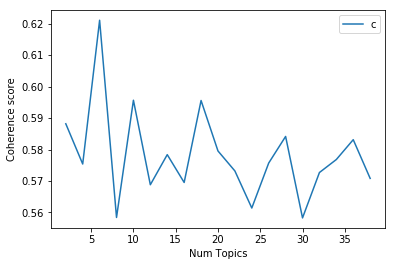

In [0]:
limit=40; start=2; step=2;
model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=documents, start=start, limit=limit, step=step)
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()